<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Neural_Network_Classification/blob/main/MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"Training Sample:\n{train_data[0]}")
print(f"Training Label:\n{train_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

2

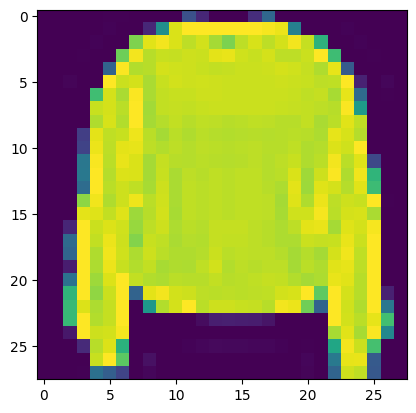

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])
plt.show
train_labels[7]

In [6]:
 class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

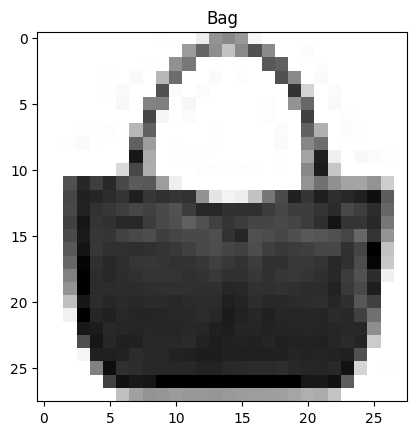

In [7]:
index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])
plt.show()

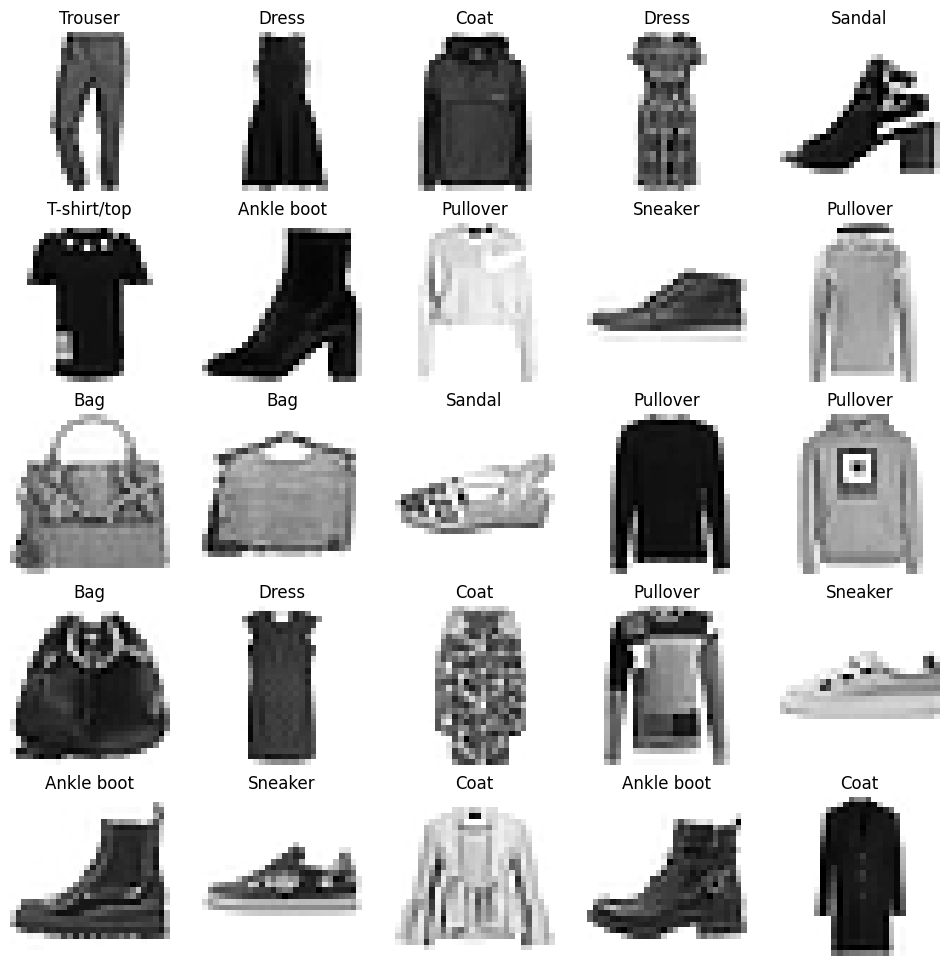

In [8]:
import random
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    rand_index = random.randint(0,len(train_data))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis("off")

In [9]:
#Model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.9178 - accuracy: 0.7224 - val_loss: 0.7419 - val_accuracy: 0.7500
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6553 - accuracy: 0.7849 - val_loss: 0.6819 - val_accuracy: 0.8079
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5972 - accuracy: 0.7980 - val_loss: 0.6084 - val_accuracy: 0.7976
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5541 - accuracy: 0.8138 - val_loss: 0.5489 - val_accuracy: 0.8133
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5401 - accuracy: 0.8187 - val_loss: 0.5240 - val_accuracy: 0.8235
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5129 - accuracy: 0.8267 - val_loss: 0.5134 - val_accuracy: 0.8212
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4709 - accuracy: 0.8385 - val_loss: 0.4989 - val_accuracy:

In [15]:
y_probs = model.predict(test_data)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.97268218e-07, 9.34173983e-09, 4.33041762e-11, 1.31647028e-07,
        7.10802042e-11, 4.92816083e-02, 4.87959879e-13, 3.89963053e-02,
        1.52813969e-04, 9.11568582e-01],
       [1.54269612e-04, 1.94933045e-06, 9.37720418e-01, 2.52446218e-04,
        4.09254283e-02, 1.61225241e-10, 2.07837131e-02, 1.68518208e-13,
        1.61832519e-04, 5.64552160e-15],
       [6.56945431e-08, 9.99979019e-01, 1.43089791e-13, 2.08473230e-05,
        7.51384344e-10, 7.83381793e-24, 6.67203937e-09, 0.00000000e+00,
        7.38918611e-14, 1.97124835e-30],
       [1.46017669e-06, 9.99479830e-01, 1.72445080e-08, 5.18484681e-04,
        1.41334382e-07, 1.17283582e-18, 7.57200667e-08, 6.20533079e-35,
        3.06413770e-12, 9.86074314e-22],
       [1.30905926e-01, 2.18008794e-02, 2.63886601e-01, 1.10026635e-01,
        1.26030788e-01, 2.92853289e-03, 2.88833201e-01, 7.20093492e-04,
        5.48184142e-02, 4.89201411e-05]], dtype=float32)

In [18]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.9726822e-07, 9.3417398e-09, 4.3304176e-11, 1.3164703e-07,
        7.1080204e-11, 4.9281608e-02, 4.8795988e-13, 3.8996305e-02,
        1.5281397e-04, 9.1156858e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [24]:
y_pred = y_probs.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [44]:
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

In [83]:
from sklearn.metrics import confusion_matrix
def plotting(test_labels, y_pred):
    cm = confusion_matrix(test_labels, y_pred, normalize='true')
    cm = cm * 100
    plt.figure(figsize=(10,10))
    accuracy = accuracy_score(test_labels, y_pred)
    print(f"Accuracy: {accuracy*100:.2f}%")
    sns.heatmap(cm, annot=True, cmap='Reds', fmt=".2f", xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

Accuracy: 83.12%


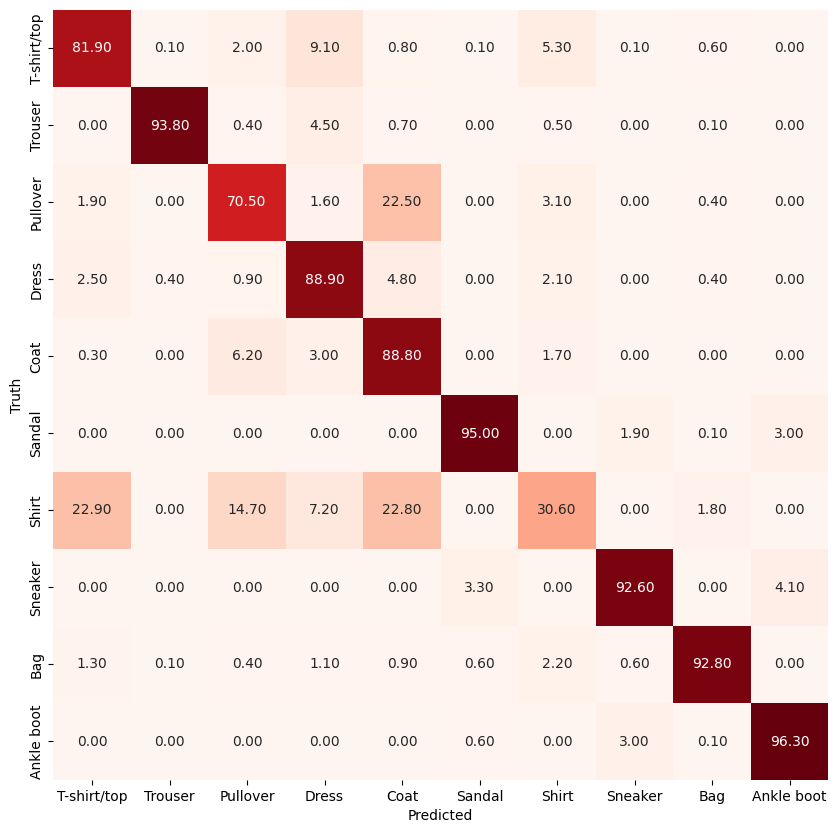

In [84]:
plotting(test_labels, y_pred)